In [1]:
import pandas as pd
import numpy as np
from numpy import where
import seaborn as sns
from collections import Counter
from copy import deepcopy

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot

import statistics
from statistics import mean 
import time
import json
import os
from os import path
import tempfile

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
region = 'california'
weights_folder = '../model_weights_updated'
results_folder = '../results_updated'

In [3]:
nex_nq500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nq500.txt", header = None, delim_whitespace=True)
nex_nqv2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nqv2m.txt", header = None, delim_whitespace=True)
nex_nqv10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nqv10m.txt", header = None, delim_whitespace=True)
nex_nrh500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nrh500.txt", header = None, delim_whitespace=True)
nex_nrh700 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nrh700.txt", header = None, delim_whitespace=True)
nex_nt2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nt2m.txt", header = None, delim_whitespace=True)
nex_nt2mdew = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nt2mdew.txt", header = None, delim_whitespace=True)
nex_nt10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nt10m.txt", header = None, delim_whitespace=True)
nex_nt500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nt500.txt", header = None, delim_whitespace=True)
nex_ntpw = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_ntpw.txt", header = None, delim_whitespace=True)
nex_nu2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nu2m.txt", header = None, delim_whitespace=True)
nex_nu10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nu10m.txt", header = None, delim_whitespace=True)
nex_nu500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nu500.txt", header = None, delim_whitespace=True)
nex_nuqv = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nuqv.txt", header = None, delim_whitespace=True)
nex_nv2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nv2m.txt", header = None, delim_whitespace=True)
nex_nv10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nv10m.txt", header = None, delim_whitespace=True)
nex_nv500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nv500.txt", header = None, delim_whitespace=True)
nex_nvqv = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nvqv.txt", header = None, delim_whitespace=True)
nex_nw500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_nex_nw500.txt", header = None, delim_whitespace=True)

ex_nq500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nq500.txt", header = None, delim_whitespace=True)
ex_nqv2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nqv2m.txt", header = None, delim_whitespace=True)
ex_nqv10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nqv10m.txt", header = None, delim_whitespace=True)
ex_nrh500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nrh500.txt", header = None, delim_whitespace=True)
ex_nrh700 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nrh700.txt", header = None, delim_whitespace=True)
ex_nt2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nt2m.txt", header = None, delim_whitespace=True)
ex_nt2mdew = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nt2mdew.txt", header = None, delim_whitespace=True)
ex_nt10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nt10m.txt", header = None, delim_whitespace=True)
ex_nt500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nt500.txt", header = None, delim_whitespace=True)
ex_ntpw = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_ntpw.txt", header = None, delim_whitespace=True)
ex_nu2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nu2m.txt", header = None, delim_whitespace=True)
ex_nu10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nu10m.txt", header = None, delim_whitespace=True)
ex_nu500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nu500.txt", header = None, delim_whitespace=True)
ex_nuqv = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nuqv.txt", header = None, delim_whitespace=True)
ex_nv2m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nv2m.txt", header = None, delim_whitespace=True)
ex_nv10m = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nv10m.txt", header = None, delim_whitespace=True)
ex_nv500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nv500.txt", header = None, delim_whitespace=True)
ex_nvqv = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nvqv.txt", header = None, delim_whitespace=True)
ex_nw500 = pd.read_csv("../data_Cal_99/DJF_CASM_99per_8005_ex_nw500.txt", header = None, delim_whitespace=True)


nq500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nq500.txt", header = None, delim_whitespace=True)
nqv2m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nqv2m.txt", header = None, delim_whitespace=True)
nqv10m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nqv10m.txt", header = None, delim_whitespace=True)
nrh500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nrh500.txt", header = None, delim_whitespace=True)
nrh700_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nrh700.txt", header = None, delim_whitespace=True)
nt2m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nt2m.txt", header = None, delim_whitespace=True)
nt2mdew_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nt2mdew.txt", header = None, delim_whitespace=True)
nt10m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nt10m.txt", header = None, delim_whitespace=True)
nt500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nt500.txt", header = None, delim_whitespace=True)
ntpw_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_ntpw.txt", header = None, delim_whitespace=True)
nu2m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nu2m.txt", header = None, delim_whitespace=True)
nu10m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nu10m.txt", header = None, delim_whitespace=True)
nu500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nu500.txt", header = None, delim_whitespace=True)
nuqv_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nuqv.txt", header = None, delim_whitespace=True)
nv2m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nv2m.txt", header = None, delim_whitespace=True)
nv10m_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nv10m.txt", header = None, delim_whitespace=True)
nv500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nv500.txt", header = None, delim_whitespace=True)
nvqv_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nvqv.txt", header = None, delim_whitespace=True)
nw500_0619 = pd.read_csv("../data_Cal_99/DJF_CASM_0619_nw500.txt", header = None, delim_whitespace=True)

In [4]:
indicator_0619 = pd.read_csv("../data/data_Cal_99/DJF_CASM_99per_0619_indicator.txt", header = None, delim_whitespace=True)
test_set_y_initial = indicator_0619[4]
test_y = test_set_y_initial.to_numpy().reshape(1, test_set_y_initial.shape[0])

In [5]:
indicator_0619 = indicator_0619.rename(columns = {0:'ID', 1:'Year', 2:'Month', 3: 'Day Number', 4: 'label'})

In [6]:
indicator_8005 = pd.read_csv("../data/data_Cal_99/DJF_CASM_99per_8005_indicator.txt", header = None, delim_whitespace=True)
indicator_8005 = indicator_8005.rename(columns = {0:'ID',1:'Year',2:'Month',3:'Day Number'})

In [7]:
nexdays_8005 = pd.read_csv("../data/data_Cal_99/nexday_99per_DJF_CASM_8005.txt", header = None, delim_whitespace=True)
nexdays_8005 = nexdays_8005.rename(columns = {0:'ID', 1:'Year', 2:'Month', 3:'Day Number'})

In [8]:
ex_ids = []
j = 0
for i in nexdays_8005['ID']:
    if i == j+1:
        j = i
        continue
    for k in range(i-j-1):
        ex_ids.append(j+k+1)
    j = i
ex_ids.append(2347)

In [9]:
indicator_8005['label'] = 0
indicator_8005.loc[indicator_8005.ID.isin(ex_ids), 'label'] = 1

In [10]:
indicator_8005

,ID,Year,Month,Day Number,label
0,1,1980,1,1,0
1,2,1980,1,2,0
2,3,1980,1,3,0
3,4,1980,1,4,0
4,5,1980,1,5,0
...,...,...,...,...,...
2342,2343,2005,12,27,0
2343,2344,2005,12,28,1
2344,2345,2005,12,29,0
2345,2346,2005,12,30,0


In [11]:
indicator_0619

,ID,Year,Month,Day Number,label
0,2348,2006,1,1,1
1,2349,2006,1,2,1
2,2350,2006,1,3,1
3,2351,2006,1,4,0
4,2352,2006,1,5,0
...,...,...,...,...,...
1258,3606,2019,12,27,0
1259,3607,2019,12,28,0
1260,3608,2019,12,29,0
1261,3609,2019,12,30,0


In [12]:
nonext_8005, ext_8005 = np.bincount(indicator_8005['label'])
total = nonext_8005 + ext_8005
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, ext_8005, 100 * ext_8005 / total))

Examples:
    Total: 2347
    Positive: 41 (1.75% of total)



In [13]:
nonext_0619, ext_0619 = np.bincount(indicator_0619['label'])
total = nonext_0619 + ext_0619
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, ext_0619, 100 * ext_0619 / total))

Examples:
    Total: 1263
    Positive: 34 (2.69% of total)



In [14]:
pos = ext_8005 + ext_0619
neg = nonext_8005 + nonext_0619

In [15]:
nexdays_index = (list(nexdays_8005['ID']))
exdays_index = ex_ids

In [17]:
nex_list = [nex_nuqv, nex_nv2m, nex_nv10m, nex_nv500, nex_nvqv, nex_nw500, nex_nq500, nex_nqv2m, 
            nex_nqv10m, nex_nrh500, nex_nrh700, nex_nt2m, nex_nt2mdew, 
            nex_nt10m, nex_nt500, nex_ntpw, nex_nu2m, nex_nu10m, nex_nu500]

ex_list = [ex_nuqv, ex_nv2m,ex_nv10m,ex_nv500,ex_nvqv,ex_nw500, 
           ex_nq500, ex_nqv2m, ex_nqv10m, ex_nrh500, ex_nrh700, ex_nt2m, 
           ex_nt2mdew, ex_nt10m, ex_nt500, ex_ntpw, ex_nu2m, ex_nu10m, ex_nu500]

test_list = [nuqv_0619, nv2m_0619, nv10m_0619, nv500_0619, nvqv_0619, 
             nw500_0619, nq500_0619, nqv2m_0619, nqv10m_0619, nrh500_0619, 
             nrh700_0619, nt2m_0619, nt2mdew_0619, nt10m_0619, nt500_0619, 
            ntpw_0619, nu2m_0619, nu10m_0619, nu500_0619]

In [21]:
for nex in nex_list:
    nex['ID'] = nexdays_index
    nex.set_index('ID', inplace = True)

for ex in ex_list:
    ex['ID'] = exdays_index
    ex.set_index('ID', inplace = True)

In [22]:
def get_train_test_df(nex_names, ex_names, test_names):
    nex_combo_8005 = pd.concat(nex_names, axis = 1)
    nex_combo_8005["label"] = 0

    ex_combo_8005 = pd.concat(ex_names, axis = 1)
    ex_combo_8005["label"] = 1

    combo_8005_df = pd.concat([ex_combo_8005, nex_combo_8005])

    test_df = pd.concat(test_names, axis = 1)
    test_df['label'] = test_y.reshape(test_y.shape[1],)

    return  combo_8005_df, test_df

In [24]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),

]


def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = Sequential()
    
    #add model layers
    model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(rows,cols,channels), activity_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(16, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [25]:
EPOCHS = 100
BATCH_SIZE = 200

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [26]:
rows = 29
cols = 33

In [27]:
def plot_loss(history, n, balance_type, combo, save_fig = False):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+balance_type)
  plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+balance_type,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.legend()
  if save_fig == True:
    path = results_folder + '/' + region + '/' + balance_type + '/' + combo
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + '/' + 'loss_plot.png')
  
    
    
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non extremes Detected (True Negatives): ', cm[0][0])
  print('Non extremes Incorrectly Detected (False Positives): ', cm[0][1])
  print('Extremes Missed (False Negatives): ', cm[1][0])
  print('Extremes Detected (True Positives): ', cm[1][1])
  print('Total  Extremes: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [28]:
def resample_dataset(train_features, train_labels, bool_train_labels, val_features, val_labels):
    pos_features = train_features[bool_train_labels]
    neg_features = train_features[~bool_train_labels]

    pos_labels = train_labels[bool_train_labels]
    neg_labels = train_labels[~bool_train_labels]
    
    ids = np.arange(len(pos_features))
    choices = np.random.choice(ids, len(neg_features))

    res_pos_features = pos_features[choices]
    res_pos_labels = pos_labels[choices]
    
    resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
    resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

    order = np.arange(len(resampled_labels))
    np.random.shuffle(order)
    resampled_features = resampled_features[order]
    resampled_labels = resampled_labels[order]
    
    BUFFER_SIZE = 1000

    def make_ds(features, labels):
        ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
        ds = ds.shuffle(BUFFER_SIZE).repeat()
        return ds

    pos_ds = make_ds(pos_features, pos_labels)
    neg_ds = make_ds(neg_features, neg_labels)
    
    resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.2, 0.8])
    resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)
    
    for features, label in resampled_ds.take(1):
        print(label.numpy().mean())
    
    val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
    val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 
    
    return resampled_ds, val_ds   

def train_with_balance(resampled_ds, val_ds):
    initial_bias = np.log([pos/neg])
    model = make_model(output_bias=initial_bias)
    initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
    model.save_weights(initial_weights)
    
    resampled_model = make_model()
    resampled_model.load_weights(initial_weights)

    # Reset the bias to zero, since this dataset is balanced.
    output_layer = resampled_model.layers[-1] 
    output_layer.bias.assign([0])
    
    resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)

    resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))
    
    return resampled_history, resampled_model

In [29]:
def train_no_balance(train_features, train_labels, val_features, val_labels):
    initial_bias = np.log([pos/neg])
    model = make_model(output_bias=initial_bias)
    initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
    model.save_weights(initial_weights)
    
    model = make_model()
    model.load_weights(initial_weights)
    
    baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))
    
    return baseline_history, model

In [30]:
def var_analysis(nex_names, ex_names, test_names, oversample = True):
    train_df, test_df = get_train_test_df(nex_names, ex_names, test_names)
    
    complete_train_df = train_df.copy(deep = True)
    complete_test_df = test_df.copy(deep = True)
    
    train_df, val_df = train_test_split(train_df, test_size=0.2)
    
    train_labels = np.array(train_df.pop('label'))
    bool_train_labels = train_labels != 0
    val_labels = np.array(val_df.pop('label'))
    test_labels = np.array(test_df.pop('label'))

    train_features = np.array(train_df)
    val_features = np.array(val_df)
    test_features = np.array(test_df)
    
    channels = len(nex_names)
    
    train_features = train_features.reshape(train_features.shape[0], rows, cols, channels)
    val_features = val_features.reshape(val_features.shape[0], rows, cols, channels)
    test_features = test_features.reshape(test_features.shape[0], rows, cols, channels)
    
    if oversample == True:
        resampled_ds, val_ds = resample_dataset(train_features, train_labels, bool_train_labels, 
                                                val_features, val_labels)
        
        resampled_history, resampled_model = train_with_balance(resampled_ds, val_ds)
#         loss_plot = plot_loss(resampled_history, "Oversampled", 1)
        
        train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
        test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
        
        resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)

        for name, value in zip(resampled_model.metrics_names, resampled_results):
              print(name, ': ', value)
        print()
        plot_cm(test_labels, test_predictions_resampled)
        
        return resampled_history, resampled_model, complete_train_df, complete_test_df
    
    if oversample == False:
        baseline_history, baseline_model = train_no_balance(train_features, train_labels, val_features, val_labels)
#         loss_plot = plot_loss(baseline_history, "No Balance", 1)
        train_predictions_baseline = baseline_model.predict(train_features, batch_size=BATCH_SIZE)
        test_predictions_baseline = baseline_model.predict(test_features, batch_size=BATCH_SIZE)
        baseline_results = baseline_model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
        for name, value in zip(baseline_model.metrics_names, baseline_results):
              print(name, ': ', value)
        print()

        plot_cm(test_labels, test_predictions_baseline)
        
        return baseline_history, baseline_model, complete_train_df, complete_test_df

In [31]:
def sort_train(unsorted_df, channels):
    sorted_df = unsorted_df.sort_index()
    train_data = sorted_df.iloc[:,0:sorted_df.shape[1]-1].to_numpy()
    train_data = train_data.reshape(train_data.shape[0], rows, cols, channels)
    train_labels = sorted_df['label'].to_numpy()
    
    
    return train_data, train_labels

In [32]:
def gen_table(model, data, indicator, balance_type, combo, train_or_test, channels, save_table = False):
    
#     data = np.array(df.drop('label', axis = 1))
#     data = data.reshape(data.shape[0], rows, cols, channels)
    predictions = model.predict(data)
    print(predictions.shape)
    predictions = predictions.reshape(predictions.shape[0],)
    predictions[predictions > 0.5] = 1
    predictions[predictions <= 0.5] = 0
    
    print(np.sum(predictions))
    
    table = indicator.copy(deep = True)
    
    table['CNN Prediction'] = predictions
    
    if save_table == True:
        path = results_folder + '/' + region + '/' + balance_type + '/' + combo
        if not os.path.exists(path):
            os.makedirs(path)
        table.to_csv(path + '/' + 'sequence_table_' + train_or_test +'.csv', index = False)
    
    return table

In [33]:
def save_weights(model, balance_type, variable):
    path = weights_folder + '/' + region + '/' + balance_type + '/' + variable + '/' + variable
    if not os.path.exists(path):
        os.makedirs(path)
    model.save_weights(path)

In [34]:
no_balance = 'no_balance'
oversampled = 'oversampled'
color_number = 1

In [35]:
baseline_histories = []
baseline_models = []
oversampled_histories = []
oversampled_models = []
cal_dfs = []
val_dfs = []

In [37]:
# nex_list = [nex_nuqv, nex_nv2m, nex_nv10m, nex_nv500, nex_nvqv, nex_nw500, nex_nq500, nex_nqv2m, 
#             nex_nqv10m, nex_nrh500, nex_nrh700, nex_nt2m, nex_nt2mdew, 
#             nex_nt10m, nex_nt500, nex_ntpw, nex_nu2m, nex_nu10m, nex_nu500]

# ex_list = [ex_nuqv, ex_nv2m,ex_nv10m,ex_nv500,ex_nvqv,ex_nw500, 
#            ex_nq500, ex_nqv2m, ex_nqv10m, ex_nrh500, ex_nrh700, ex_nt2m, 
#            ex_nt2mdew, ex_nt10m, ex_nt500, ex_ntpw, ex_nu2m, ex_nu10m, ex_nu500]

# test_list = [nuqv_0619, nv2m_0619, nv10m_0619, nv500_0619, nvqv_0619, 
#              nw500_0619, nq500_0619, nqv2m_0619, nqv10m_0619, nrh500_0619, 
#              nrh700_0619, nt2m_0619, nt2mdew_0619, nt10m_0619, nt500_0619, 
#             ntpw_0619, nu2m_0619, nu10m_0619, nu500_0619]

# Use below cell to specify the required combination

In [131]:
variable = 'nuqv_nvqv_ntpw_nw500'
nex_names = [nex_nuqv, nex_nvqv, nex_ntpw, nex_nw500]
ex_names = [ex_nuqv, ex_nvqv, ex_ntpw, ex_nw500]
test_names = [nuqv_0619, nvqv_0619, ntpw_0619, nw500_0619]
channels = 4

Epoch 1/100
10/10 [==============================] - 1s 140ms/step - loss: 24.8031 - tp: 14.0000 - fp: 52.0000 - tn: 3020.0000 - fn: 54.0000 - accuracy: 0.9662 - precision: 0.2121 - recall: 0.2059 - auc: 0.6832 - val_loss: 20.4619 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3747
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 17.4460 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1843.0000 - fn: 34.0000 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4065 - val_loss: 14.5080 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5142
Epoch 3/100
10/10 [==============================] - 1s 68ms/step - loss: 12.4229 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1843.0000 - fn: 34.0000 - accuracy: 0.9819 - precision: 0.0

Epoch 21/100
10/10 [==============================] - 0s 29ms/step - loss: 0.6060 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1843.0000 - fn: 34.0000 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6044 - val_loss: 0.5874 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5614
Epoch 22/100
10/10 [==============================] - 0s 28ms/step - loss: 0.5617 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1843.0000 - fn: 34.0000 - accuracy: 0.9819 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6041 - val_loss: 0.5451 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5750
Epoch 23/100
10/10 [==============================] - 0s 29ms/step - loss: 0.5229 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1843.0000 - fn: 34.0000 - accuracy: 0.9819 - pre

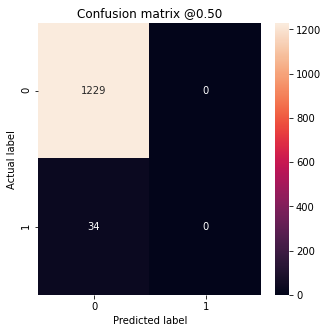

In [132]:
baseline_history, baseline_model, cal_df, val_df =  var_analysis(nex_names, 
                                                                            ex_names, 
                                                                            test_names, 
                                                                            oversample = False)
# baseline_histories.append(baseline_history), baseline_models.append(baseline_model)

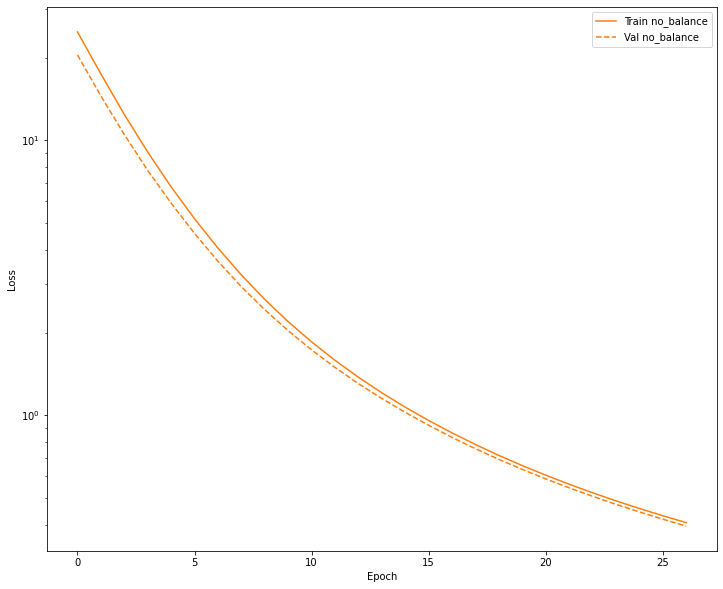

In [133]:
plot_loss(baseline_history, color_number, no_balance, variable, save_fig = True)

In [134]:
save_weights(baseline_model, no_balance, variable)

In [135]:
train_data, train_labels = sort_train(cal_df, channels = channels)
test_data = np.array(val_df.iloc[:,:-1]).reshape(val_df.shape[0], rows, cols, channels)
train_table = gen_table(baseline_model, train_data, indicator_8005, no_balance, variable, 'train', channels = channels, save_table = True)
test_table = gen_table(baseline_model, test_data, indicator_0619, no_balance, variable, 'test', channels = channels, save_table = True)

(2347, 1)
0.0
(1263, 1)
0.0


0.18
Epoch 1/1000
20/20 [==============================] - 2s 84ms/step - loss: 19.8369 - tp: 85.0000 - fp: 364.0000 - tn: 4083.0000 - fn: 731.0000 - accuracy: 0.7919 - precision: 0.1893 - recall: 0.1042 - auc: 0.6678 - val_loss: 12.6637 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5321
Epoch 2/1000
20/20 [==============================] - 1s 27ms/step - loss: 10.1509 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3218.0000 - fn: 782.0000 - accuracy: 0.8045 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7248 - val_loss: 6.8820 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 7.0000 - val_accuracy: 0.9851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5750
Epoch 3/1000
20/20 [==============================] - 1s 27ms/step - loss: 5.7900 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3219.0000 - fn: 781.0000 - accuracy: 0.8048 - preci

Epoch 21/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.4930 - tp: 24.0000 - fp: 0.0000e+00 - tn: 3257.0000 - fn: 719.0000 - accuracy: 0.8202 - precision: 1.0000 - recall: 0.0323 - auc: 0.9639 - val_loss: 0.2997 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 6.0000 - val_accuracy: 0.9872 - val_precision: 1.0000 - val_recall: 0.1429 - val_auc: 0.8778
Epoch 22/1000
20/20 [==============================] - 1s 25ms/step - loss: 0.4876 - tp: 65.0000 - fp: 0.0000e+00 - tn: 3204.0000 - fn: 731.0000 - accuracy: 0.8173 - precision: 1.0000 - recall: 0.0817 - auc: 0.9692 - val_loss: 0.2940 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 463.0000 - val_fn: 6.0000 - val_accuracy: 0.9872 - val_precision: 1.0000 - val_recall: 0.1429 - val_auc: 0.9023
Epoch 23/1000
20/20 [==============================] - 1s 25ms/step - loss: 0.4688 - tp: 97.0000 - fp: 0.0000e+00 - tn: 3213.0000 - fn: 690.0000 - accuracy: 0.8275 - precision: 1.0000 - recall: 0.1233 - auc: 0.97

20/20 [==============================] - 1s 27ms/step - loss: 0.2287 - tp: 634.0000 - fp: 48.0000 - tn: 3189.0000 - fn: 129.0000 - accuracy: 0.9557 - precision: 0.9296 - recall: 0.8309 - auc: 0.9933 - val_loss: 0.1563 - val_tp: 3.0000 - val_fp: 6.0000 - val_tn: 457.0000 - val_fn: 4.0000 - val_accuracy: 0.9787 - val_precision: 0.3333 - val_recall: 0.4286 - val_auc: 0.9678
Epoch 43/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.2337 - tp: 688.0000 - fp: 59.0000 - tn: 3122.0000 - fn: 131.0000 - accuracy: 0.9525 - precision: 0.9210 - recall: 0.8400 - auc: 0.9910 - val_loss: 0.1642 - val_tp: 3.0000 - val_fp: 7.0000 - val_tn: 456.0000 - val_fn: 4.0000 - val_accuracy: 0.9766 - val_precision: 0.3000 - val_recall: 0.4286 - val_auc: 0.9799
Epoch 44/1000
20/20 [==============================] - 1s 25ms/step - loss: 0.2232 - tp: 669.0000 - fp: 58.0000 - tn: 3163.0000 - fn: 110.0000 - accuracy: 0.9580 - precision: 0.9202 - recall: 0.8588 - auc: 0.9915 - val_loss: 0.1568 - val_

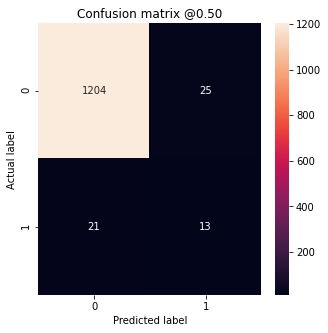

In [136]:
oversampled_history, oversampled_model, cal_df, val_df =  var_analysis(nex_names,ex_names, test_names, 
                                                                                            oversample = True) 
                                                                                                        

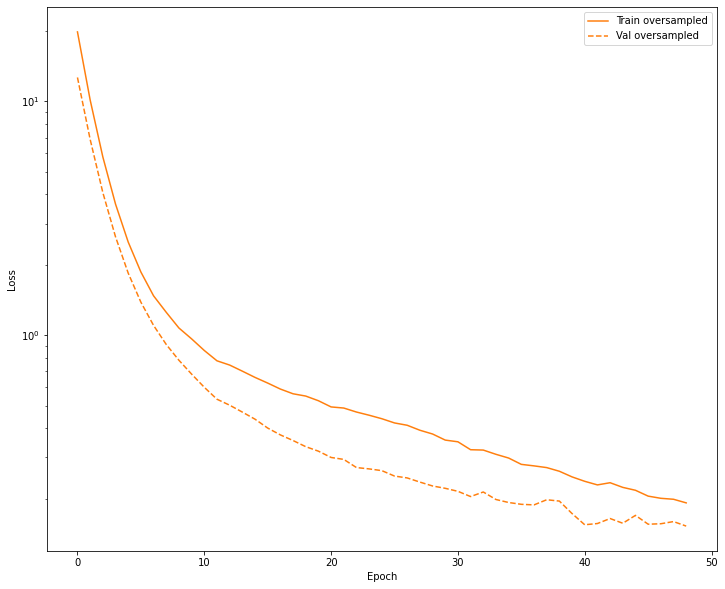

In [137]:
plot_loss(oversampled_history, color_number, oversampled, variable, save_fig = True)

In [138]:
save_weights(oversampled_model, oversampled, variable)

In [139]:
train_data, train_labels = sort_train(cal_df, channels = channels)
test_data = np.array(val_df.iloc[:,:-1]).reshape(val_df.shape[0], rows, cols, channels)
train_table = gen_table(oversampled_model, train_data, indicator_8005, oversampled, variable, 'train', channels = channels, 
                        save_table = True)
test_table = gen_table(oversampled_model, test_data, indicator_0619, oversampled, variable, 'test', channels = channels, 
                       save_table = True)

(2347, 1)
86.0
(1263, 1)
38.0


In [140]:
train_table[(train_table['label'] == 1) & (train_table['CNN Prediction'] == 1)].shape

(34, 6)

In [142]:
test_table[(test_table['label'] == 1) & (test_table['CNN Prediction'] == 1)].shape

(13, 6)